# Manifold Learning

In [4]:
# import libraries
import numpy as np
import math
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.core.pylabtools import figsize
plt.style.use('default')
plt.rcParams['figure.facecolor'] = 'white'
figsize(12, 6)

# display multiple outputs within a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all";

# ignore warnings
import warnings
warnings.filterwarnings('ignore');

## Sampling uniformly within n-dimensional unit spheres

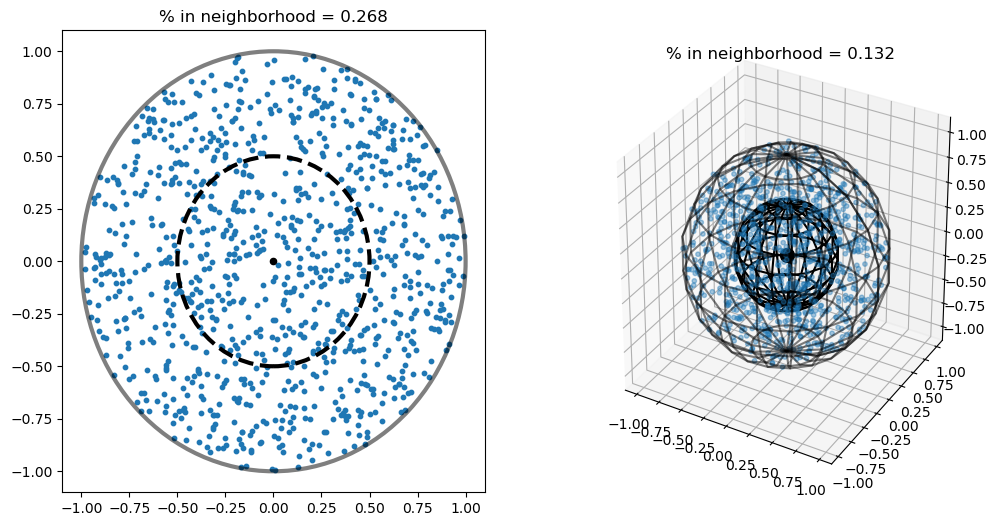

In [5]:
# plot unit circle in R^2
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
circ = plt.Circle((0, 0), radius=1, edgecolor='black', facecolor='None', linewidth=3, alpha=0.5)
ax.add_patch(circ)
circ = plt.Circle((0, 0), radius=0.5, edgecolor='black', facecolor='None', linewidth=3, linestyle='--')
ax.add_patch(circ)

# sample within unit sphere in R^2
n = 1000
theta = np.random.uniform(0, 2*math.pi, n)
u = np.random.uniform(0, 1, n)
r = np.sqrt(u)
x = r * np.cos(theta)
y = r * np.sin(theta)
ax.scatter(x, y, s=10, alpha=1)

# proportion within neighborhood
p = np.sum((x**2 + y**2) <= 0.5**2) / n
ax.scatter(0, 0, s=20, c='black')
plt.title("% in neighborhood = " + str(p))

# plot unit sphere in R^3
ax = fig.add_subplot(1, 2, 2, projection='3d')
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)
ax.plot_wireframe(x, y, z, color="black", alpha=0.5)
ax.plot_wireframe(0.5*x, 0.5*y, 0.5*z, color="black")

# uniform sampling
phi = np.random.uniform(0, 2*math.pi, n)
costheta = np.random.uniform(-1, 1, n)
u = np.random.uniform(0, 1, n)

theta = np.arccos(costheta)
r = u**(1/3)
x = r * np.sin(theta) * np.cos(phi)
y = r * np.sin(theta) * np.sin(phi)
z = r * np.cos(theta)
ax.scatter(x, y, z, alpha=0.4, s=10)

# proportion within neighborhood
p = np.sum((x**2 + y**2 + z**2) <= 0.5**2) / n
ax.scatter([0], [0], [0], color="black", s=100)
plt.title("% in neighborhood = " + str(p));

## MNIST Digits

In [6]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
mnist.data.shape

C:\Users\GAO\AppData\Local\Continuum\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\GAO\AppData\Local\Continuum\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)


(70000, 784)

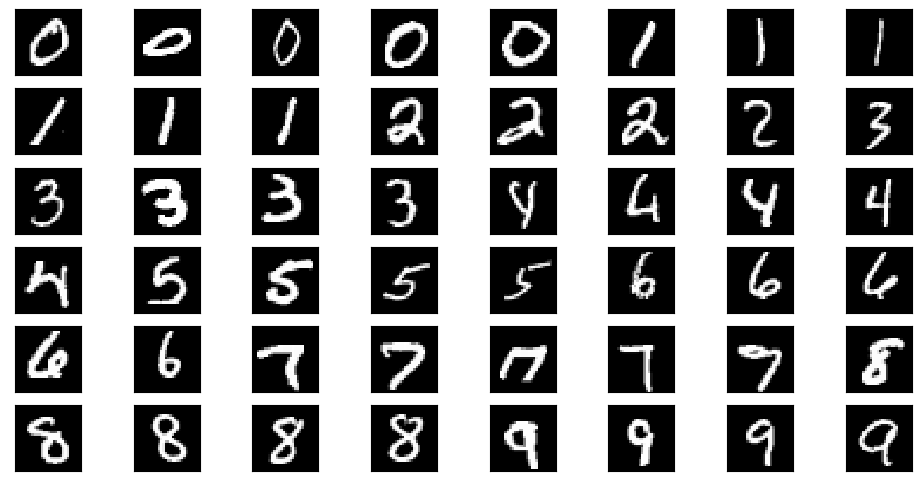

In [7]:
fig, ax = plt.subplots(6, 8, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    _ = axi.imshow(mnist.data[1250 * i].reshape(28, 28), cmap='gray');

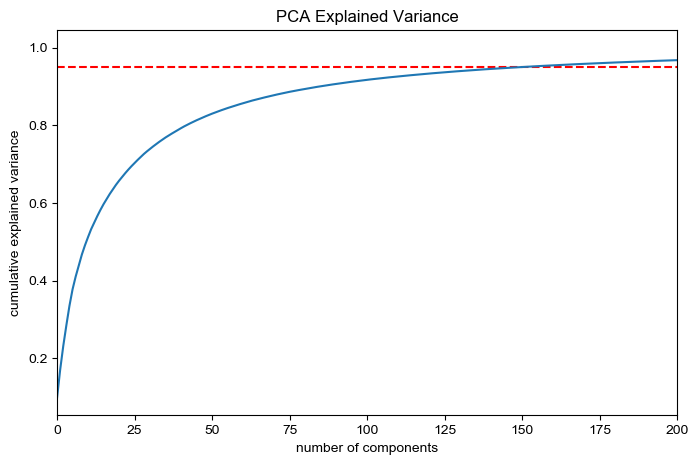

95% Explained Variance with 150 Principal Components


In [8]:
# explained variance from principal components
from sklearn.decomposition import PCA
# take subset of mnist data (1/10 of observations)
data = mnist.data[::10]
model = PCA()
proj = model.fit_transform(data)
cumsum = np.cumsum(model.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
plt.figure(figsize=(8,5))
plt.plot((0, 800), (0.95, 0.95), 'r--')
plt.plot(cumsum)
plt.xlim(0,200)
plt.style.use('seaborn')
plt.title('PCA Explained Variance')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()
print('95% Explained Variance with ' + str(d) + ' Principal Components');

## The Manifold Hypothesis

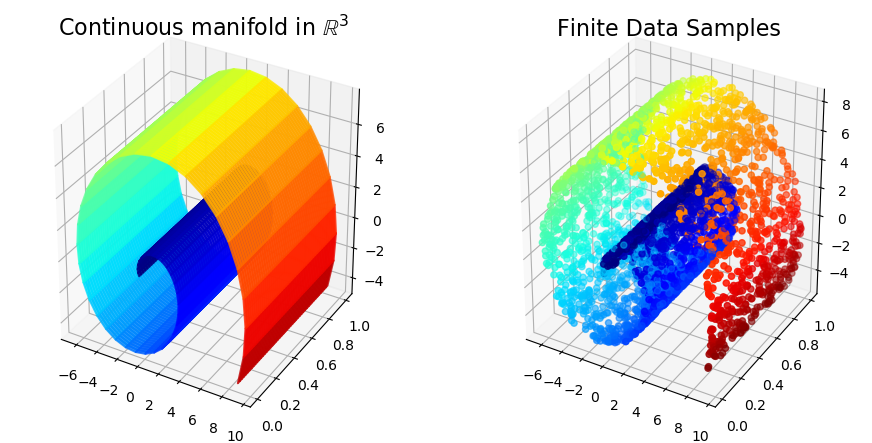

In [9]:
# draw samples to create the grid
t = np.linspace(0, 1, 50)
u = np.linspace(0, 1, 50)
v = 3*np.pi/2*(.1 + 2*t)
u,v = np.meshgrid(u,v)

# swiss roll transformation
x = -v*np.cos(v)
y = u
z = v*np.sin(v)

# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(0.5))
plt.style.use('default')
plt.rcParams['figure.facecolor'] = 'white'

# plot 3d surface
colors = plt.cm.jet((x**2 + z**2) / 100)
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=colors, cmap=plt.cm.coolwarm, linewidth=1.4, alpha=0.8)
ax.set_title('Continuous manifold in $\mathbb{R}^3$', size=16);

# draw uniform samples from the continuous manifold
n = 4000
t = np.random.rand(n, 1)
u = np.random.rand(n, 1)
v = 3*np.pi/2*(.1 + 2*t)

x = -v*np.cos(v)
y = u
z = v*np.sin(v)
color = (x**2 + z**2) / 100
color = color.reshape(n,)

# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter(x, y, z, cmap=plt.cm.jet, c=color);
ax.set_title('Finite Data Samples', size=16);
plt.show();

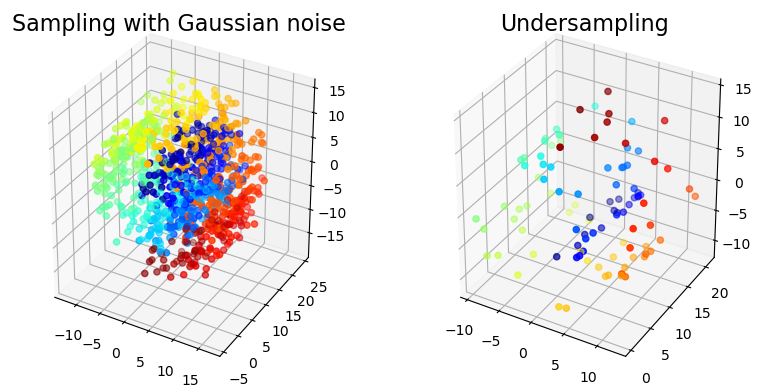

In [10]:
# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(0.5))

# sample from swiss roll dataset
from sklearn.datasets.samples_generator import make_swiss_roll
X, color = make_swiss_roll(n_samples = 1000, noise=1.5)
ax = fig.add_subplot(1, 2, 1, projection = '3d')
ax.scatter(X[:, 0], X[:, 1], -X[:, 2], c=color, cmap=plt.cm.jet)
ax.set_title('Sampling with Gaussian noise', size=16)

# undersample from manifold
X, color = make_swiss_roll(n_samples = 100, random_state=8888)
ax = fig.add_subplot(1, 2, 2, projection = '3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.jet)
ax.set_title('Undersampling', size=16);
plt.show();

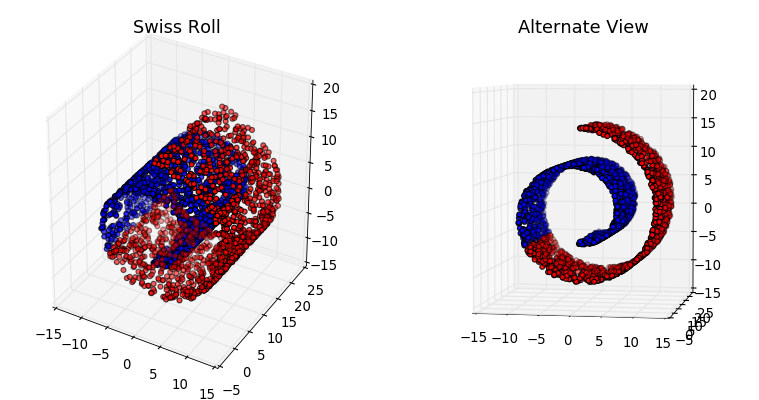

In [11]:
X, color = make_swiss_roll(n_samples = 3000)
plt.style.use('classic')
plt.rcParams['figure.facecolor'] = 'white'
fig = plt.figure(figsize = (12, 6))
ax = fig.add_subplot(1, 2, 1, projection = '3d')
ax.scatter(X[(color < 10), 0], X[(color < 10), 1], X[(color < 10), 2], c='blue')
ax.scatter(X[(color >= 10), 0], X[(color >= 10), 1], X[(color >= 10), 2], c='red')
ax.set_title('Swiss Roll', size=16)

ax = fig.add_subplot(1, 2, 2, projection = '3d')
ax.scatter(X[(color < 10), 0], X[(color < 10), 1], X[(color < 10), 2], c='blue')
ax.scatter(X[(color >= 10), 0], X[(color >= 10), 1], X[(color >= 10), 2], c='red')
ax.set_title('Alternate View', size=16)
ax.view_init(4, -80);
plt.show();

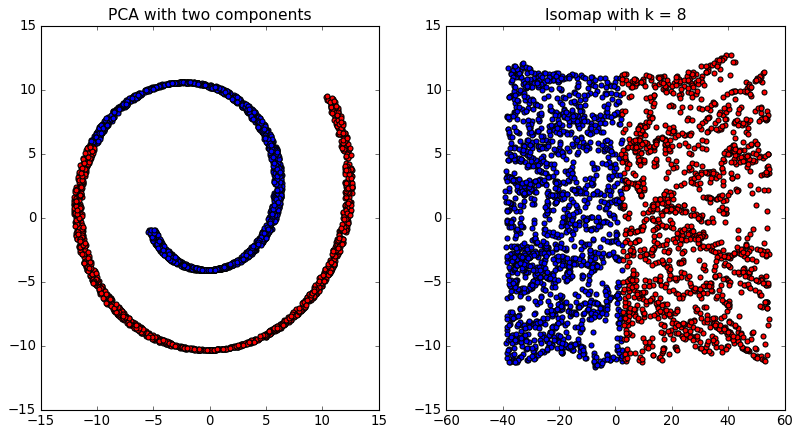

In [12]:
from sklearn.manifold import Isomap
from sklearn.decomposition import PCA

fig = plt.figure(figsize=(12,6))
data = X
k = 8

pca = PCA(n_components=2)
pca.fit(data)
X_pca = pca.transform(data)

ax = fig.add_subplot(1, 2, 1)
ax.scatter(X_pca[(color < 10), 0], X_pca[(color < 10), 1], c='blue')
ax.scatter(X_pca[(color >= 10), 0], X_pca[(color >= 10), 1], c='red')
ax.set_title('PCA with two components', size=14)

model = Isomap(n_components=2, n_neighbors=k)
X_iso = model.fit_transform(data)
ax = fig.add_subplot(1, 2, 2)
ax.scatter(X_iso[(color < 10), 0], X_iso[(color < 10), 1], c='blue')
ax.scatter(X_iso[(color >= 10), 0], X_iso[(color >= 10), 1], c='red')
ax.set_title('Isomap with k = ' + str(k), size=14);

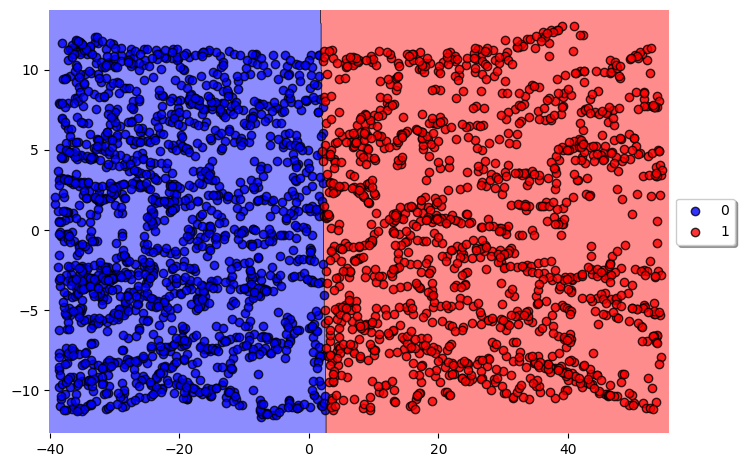

In [13]:
from mlxtend.plotting import plot_decision_regions
from sklearn.svm import LinearSVC
clf = LinearSVC()
plt.style.use('default')
y = np.zeros((len(X_iso)))
y[color < 10] = 0
y[color >= 10] = 1
y = y.astype('int')
svm_clf = clf.fit(X_iso, y)
plt.figure(figsize=(10,5.5))
ax = plot_decision_regions(X_iso, y, clf=svm_clf, legend=2, markers='oo', colors='blue,red')
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), shadow=True)
plt.show();